<a href="https://colab.research.google.com/github/surkhanjay-ops/Face-mask-detection-CNN/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Mask Detection

In [1]:
#checkj the installed version of the python and install kaggle for dataset

import sys
print(f"Python Version: {sys.version}")

!pip install kaggle

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [2]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Define the path to the zip file in Google Drive
zip_file_name = 'archive.zip'
zip_file_path = f'/content/drive/MyDrive/{zip_file_name}' # Assumes it's in the root of My Drive
extraction_path = './extracted_archive'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    print(f"Found {zip_file_name} at {zip_file_path}")

    # Create extraction directory if it doesn't exist
    os.makedirs(extraction_path, exist_ok=True)

    # Unzip the file
    print(f"Extracting {zip_file_name} to {extraction_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print("Extraction complete.")

    # List contents of the extracted directory to confirm
    print(f"Contents of {extraction_path}:")
    !ls {extraction_path}
else:
    print(f"Error: {zip_file_name} not found at {zip_file_path}. Please ensure the file is in your Google Drive's root directory and spelled correctly.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found archive.zip at /content/drive/MyDrive/archive.zip
Extracting archive.zip to ./extracted_archive...
Extraction complete.
Contents of ./extracted_archive:
'Face Mask Dataset'


In [3]:
!ls #find the files in the directory

drive  extracted_archive  sample_data


#Dependencies import

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithMask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['Augmented_434_619700.png', '80.png', 'Augmented_618_8064135.png', 'Augmented_583_5878581.png', 'Augmented_645_2544090.png']
['Augmented_325_8534863.png', 'Augmented_637_1756918.png', 'Augmented_489_4461895.png', '439.png', '1382.png']


In [6]:
without_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithoutMask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['5800.png', '80.png', '1899.png', '3559.png', '2833.png']
['4575.png', '3160.png', '3484.png', '439.png', '1382.png']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 5000
Number of without mask images: 5000


Creating labels for the two class of images

With mask = 1

Without mask = 0

In [8]:
# create the labels

with_mask_labels = [1]*5000

without_mask_labels = [0]*5000

In [9]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

5000
5000


In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

10000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


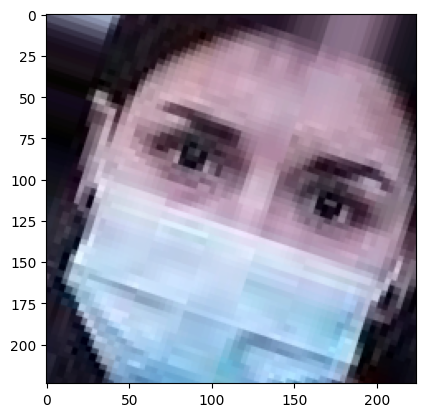

In [12]:
# displaying with mask image
img = mpimg.imread('/content/extracted_archive/Face Mask Dataset/Train/WithMask/Augmented_155_6618904.png')
imgplot = plt.imshow(img)
plt.show()

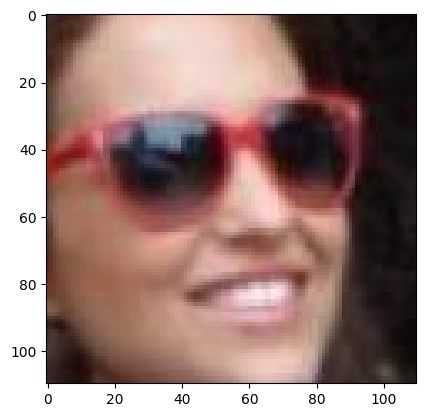

In [13]:
# displaying without mask image
img = mpimg.imread('/content/extracted_archive/Face Mask Dataset/Train/WithoutMask/1644.png')
imgplot = plt.imshow(img)
plt.show()

Image processing

1) Resizing the Images
2) Covert the image into the numpy arrays

In [14]:
# Re-initialize with_mask_files with the correct directory
import os

with_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithMask')
print(f"Corrected 'WithMask' files sample: {with_mask_files[0:5]}")

Corrected 'WithMask' files sample: ['Augmented_434_619700.png', '80.png', 'Augmented_618_8064135.png', 'Augmented_583_5878581.png', 'Augmented_645_2544090.png']


In [15]:
# Re-initialize without_mask_files with the correct directory
without_mask_files = os.listdir('/content/extracted_archive/Face Mask Dataset/Train/WithoutMask')
print(f"Corrected 'WithoutMask' files sample: {without_mask_files[0:5]}")

Corrected 'WithoutMask' files sample: ['5800.png', '80.png', '1899.png', '3559.png', '2833.png']


In [16]:
import numpy as np
from PIL import Image

# convert images to numpy arrays

with_mask_path = '/content/extracted_archive/Face Mask Dataset/Train/WithMask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/extracted_archive/Face Mask Dataset/Train/WithoutMask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

print(f"Successfully processed {len(data)} images.")

Successfully processed 10000 images.


In [17]:
#!nvidia-smi

In [18]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [19]:
type(data)

list

In [20]:
len(data)

10000

array([[[19, 15, 17],
        [19, 15, 15],
        [19, 15, 15],
        ...,
        [44, 30, 25],
        [40, 29, 25],
        [39, 30, 26]],

       [[20, 13, 20],
        [20, 14, 17],
        [21, 15, 18],
        ...,
        [43, 29, 23],
        [40, 29, 23],
        [39, 29, 24]],

       [[21, 12, 21],
        [22, 12, 20],
        [22, 13, 21],
        ...,
        [43, 27, 20],
        [39, 28, 21],
        [38, 29, 21]],

       ...,

       [[39, 29, 40],
        [39, 29, 40],
        [40, 29, 40],
        ...,
        [32, 28, 32],
        [32, 26, 31],
        [32, 26, 31]],

       [[39, 29, 40],
        [39, 29, 40],
        [40, 29, 40],
        ...,
        [32, 27, 32],
        [32, 26, 31],
        [32, 26, 31]],

       [[39, 29, 40],
        [39, 29, 40],
        [40, 29, 40],
        ...,
        [32, 26, 32],
        [32, 26, 31],
        [32, 26, 31]]], dtype=uint8)
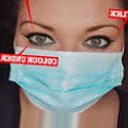

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

### Converting Image Data to NumPy Array and Normalizing

In [24]:
# Convert image list to a numpy array
X = np.array(data)

# Normalize the image data
#X = X / 255.0


print(f"Shape of processed image data (X): {X.shape}")

Shape of processed image data (X): (10000, 128, 128, 3)


### Converting Labels to NumPy Array

In [25]:
# Convert labels list to a numpy array
Y = np.array(labels)

print(f"Shape of labels data (Y): {Y.shape}")

Shape of labels data (Y): (10000,)


In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(10000, 128, 128, 3)
(10000,)


### Splitting Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (8000, 128, 128, 3)
Shape of Y_train: (8000,)
Shape of X_test: (2000, 128, 128, 3)
Shape of Y_test: (2000,)


In [30]:
print((X.shape),
      (X_train.shape),
      (X_test.shape))

(10000, 128, 128, 3) (8000, 128, 128, 3) (2000, 128, 128, 3)


In [31]:
print((Y.shape),
      (Y_train.shape),
      (Y_test.shape))

(10000,) (8000,) (2000,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [33]:
# This compile step is handled within the model definition cell (3kuOyxlYlLZi) to ensure consistency.
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
X_train_scaled[0]

array([[[0.75686275, 0.76078431, 0.76862745],
        [0.56862745, 0.57647059, 0.58431373],
        [0.3254902 , 0.32941176, 0.33333333],
        ...,
        [0.11764706, 0.11764706, 0.10980392],
        [0.15686275, 0.15686275, 0.14901961],
        [0.18039216, 0.18039216, 0.17254902]],

       [[0.73333333, 0.7372549 , 0.74509804],
        [0.51764706, 0.52156863, 0.52941176],
        [0.27843137, 0.27843137, 0.28627451],
        ...,
        [0.11764706, 0.11764706, 0.10980392],
        [0.15686275, 0.15686275, 0.14901961],
        [0.18431373, 0.18431373, 0.17647059]],

       [[0.65882353, 0.6627451 , 0.67058824],
        [0.4627451 , 0.4627451 , 0.47058824],
        [0.24705882, 0.24705882, 0.25490196],
        ...,
        [0.11372549, 0.11372549, 0.10588235],
        [0.15686275, 0.15686275, 0.14901961],
        [0.19607843, 0.19607843, 0.19215686]],

       ...,

       [[0.06666667, 0.07058824, 0.05098039],
        [0.07058824, 0.0745098 , 0.05490196],
        [0.07843137, 0

array([[[193, 194, 196],
        [145, 147, 149],
        [ 83,  84,  85],
        ...,
        [ 30,  30,  28],
        [ 40,  40,  38],
        [ 46,  46,  44]],

       [[187, 188, 190],
        [132, 133, 135],
        [ 71,  71,  73],
        ...,
        [ 30,  30,  28],
        [ 40,  40,  38],
        [ 47,  47,  45]],

       [[168, 169, 171],
        [118, 118, 120],
        [ 63,  63,  65],
        ...,
        [ 29,  29,  27],
        [ 40,  40,  38],
        [ 50,  50,  49]],

       ...,

       [[ 17,  18,  13],
        [ 18,  19,  14],
        [ 20,  20,  16],
        ...,
        [ 31,  30,  28],
        [ 29,  28,  26],
        [ 27,  26,  24]],

       [[ 17,  18,  13],
        [ 18,  19,  14],
        [ 20,  20,  16],
        ...,
        [ 31,  30,  28],
        [ 28,  27,  25],
        [ 27,  26,  24]],

       [[ 18,  19,  14],
        [ 18,  20,  14],
        [ 20,  20,  16],
        ...,
        [ 29,  28,  26],
        [ 25,  24,  22],
        [ 26,  25,  23]]], dtype=uint8)
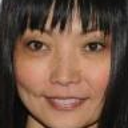

In [36]:
X_train[0]

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 3)), # Explicit Input layer for clarity and robustness
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # Binary classification (mask/no mask)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, batch_size=32, validation_split=0.1, epochs=5)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8651 - loss: 0.2692 - val_accuracy: 0.9825 - val_loss: 0.0385
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9801 - loss: 0.0528 - val_accuracy: 0.9837 - val_loss: 0.0414
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9854 - loss: 0.0459 - val_accuracy: 0.9825 - val_loss: 0.0398
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9864 - loss: 0.0369 - val_accuracy: 0.9825 - val_loss: 0.0419
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9896 - loss: 0.0264 - val_accuracy: 0.9937 - val_loss: 0.0101


Model Evaluation

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9879 - loss: 0.0443
Test Accuracy = 0.9890000224113464


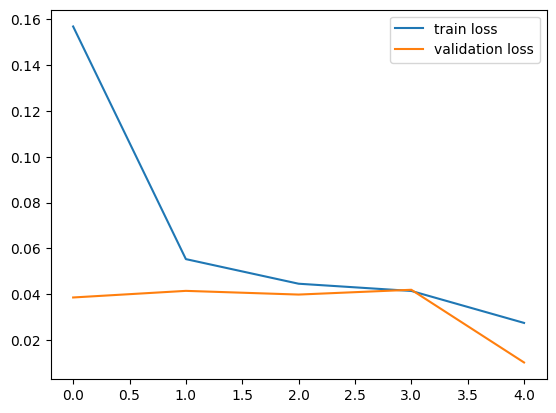

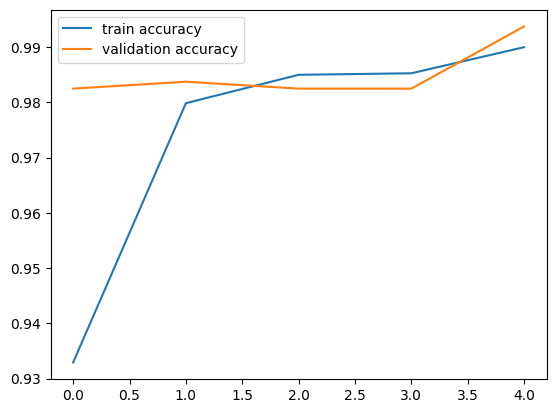

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Predication System

In [43]:
#input_image_path = input('Path of the image to be predicted: ')

#input_image = cv2.imread(input_image_path)

#cv2_imshow(input_image)

#input_image_resized = cv2.resize(input_image, (128,128))

#input_image_scaled = input_image_resized/255

#input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#input_prediction = model.predict(input_image_reshaped)

#print(input_prediction)


#input_pred_label = np.argmax(input_prediction)

#print(input_pred_label)


#if input_pred_label == 1:

 # print('The person in the image is wearing a mask')

#else:

  #print('The person in the image is not wearing a mask""")

Please upload the image file for prediction:


Saving Screenshot 2026-01-28 005155.png to Screenshot 2026-01-28 005155.png


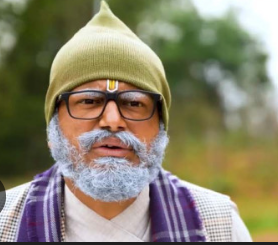

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
[[0.9966467]]
The person in the image is not wearing a mask


In [44]:
# to import dataset file in google colab
from google.colab import files
import os

#This will open a file chooser in Colab
print("Please upload the image file for prediction:")
uploaded = files.upload()

# Get the filename from the uploaded dictionary
if uploaded:
    uploaded_filename = list(uploaded.keys())[0]
    # Save the uploaded file to a temporary location
    with open(uploaded_filename, 'wb') as f:
        f.write(uploaded[uploaded_filename])

    input_image_path = uploaded_filename

    input_image = cv2.imread(input_image_path)

    # Check if image was loaded correctly
    if input_image is  None:
        print(f"Error: Could not load image from {input_image_path}. Please check the file format.")
    else:
        cv2_imshow(input_image)

        input_image_resized = cv2.resize(input_image, (128,128))

        input_image_scaled = input_image_resized/255

        input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

        input_prediction = model.predict(input_image_reshaped)

        print(input_prediction)


        # For binary classification with sigmoid output, a threshold is typically used, e.g., 0.5
        # np.argmax is for multi-class where output is a probability distribution over classes
        # Here, a single value close to 0 or 1 is predicted.
        if input_prediction[0][0] > 1:
          print('The person in the image is wearing a mask')
        else:
          print('The person in the image is not wearing a mask')

        # Clean up the temporary file
        os.remove(uploaded_filename)
else:
    print("No file was uploaded.")

### Demonstrating `face_detection_model` with an uploaded image

Please upload an image file for face detection demonstration:


Saving Screenshot 2026-01-28 022804.png to Screenshot 2026-01-28 022804 (1).png
Uploaded file for demonstration: Screenshot 2026-01-28 022804 (1).png


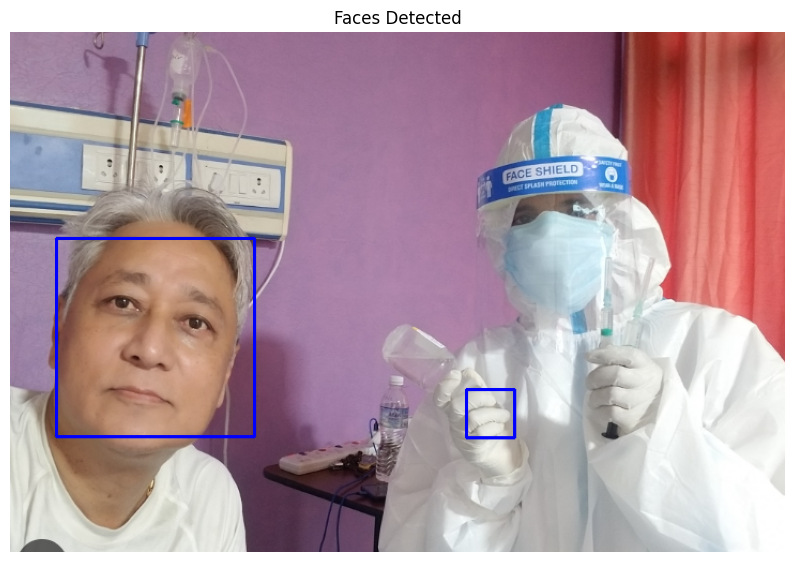

In [47]:
from google.colab import files
import os
import cv2
import matplotlib.pyplot as plt

# Assuming face_detection_model (face_classifier) is already loaded from previous steps
# If not, ensure you run cells that define `haar_cascade_filename` and `face_classifier`

# Define and load the Haar Cascade classifier for face detection
cascPath = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
face_classifier = cv2.CascadeClassifier(cascPath)

print("Please upload an image file for face detection demonstration:")
uploaded_demo = files.upload()

if uploaded_demo:
    demo_filename = list(uploaded_demo.keys())[0]
    # Save the uploaded file locally
    with open(demo_filename, 'wb') as f:
        f.write(uploaded_demo[demo_filename])

    print(f"Uploaded file for demonstration: {demo_filename}")

    # Load the image for processing
    img_for_detection = cv2.imread(demo_filename)

    if img_for_detection is None:
        print(f"Error: Could not load image from {demo_filename}. Please check file format.")
    else:
        # Convert to grayscale for face detection
        gray_img_for_detection = cv2.cvtColor(img_for_detection, cv2.COLOR_BGR2GRAY)

        # Perform face detection using face_classifier
        # Using `face_classifier` which was loaded as `cv2.CascadeClassifier(haar_cascade_filename)`
        detected_faces = face_classifier.detectMultiScale(
            gray_img_for_detection,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )

        # Draw bounding boxes on the original color image
        for (x, y, w, h) in detected_faces:
            cv2.rectangle(img_for_detection, (x, y), (x+w, y+h), (255, 0, 0), 2) # Blue bounding box

        # Display the image with detected faces
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img_for_detection, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
        plt.title('Faces Detected')
        plt.axis('off')
        plt.show(demo_filename)

   # Clean up the temporary file
      #  os.remove(demo_filename)
      #  print(f"Removed temporary file: {demo_filename}")
#else:
   # print("No image was uploaded for demonstration.")"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


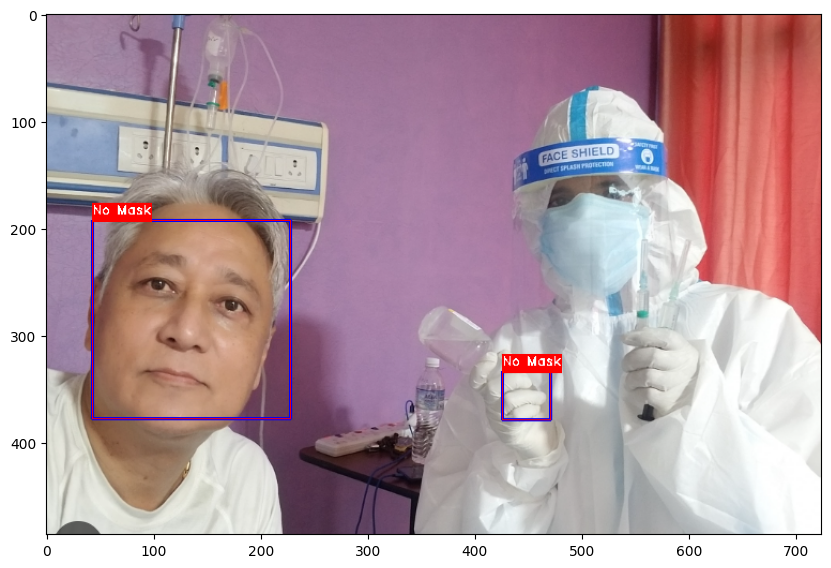

In [48]:
mask_det_label = {0: "No Mask", 1: "Mask"}
mask_det_label_colour = {0: (255, 0, 0), 1: (0, 255, 0)} # Red for No Mask, Green for Mask
pad_y = 1  # padding for result text

demo_filename = cv2.cvtColor(img_for_detection, cv2.COLOR_RGB2BGR)  # colored output image

# For detected faces in the image
for i in range(len(detected_faces)):
    (x, y, w, h) = detected_faces[i]
    cropped_face = demo_filename[y : y + h, x : x + w]
    cropped_face = cv2.resize(cropped_face, (128, 128))
    cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0
    mask_result = model.predict(cropped_face)  # make model prediction
    print_label = mask_det_label[mask_result.argmax()] # get mask/no mask based on prediction
    label_colour = mask_det_label_colour[mask_result.argmax()] # green for mask, red for no mask

    # Print result
    (t_w, t_h), _ = cv2.getTextSize(
        print_label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1
    )  # getting the text size

    cv2.rectangle(
        demo_filename,
        (x, y + pad_y),
        (x + t_w, y - t_h - pad_y - 6),
        label_colour,
        -1,
    )  # draw rectangle

    cv2.putText(
        demo_filename,
        print_label,
        (x, y - 6),
        cv2.FONT_HERSHEY_DUPLEX,
        0.4,
        (255, 255, 255), # white
        1,
    )  # print text

    cv2.rectangle(
        demo_filename,
        (x, y),
        (x + w, y + h),
        label_colour,
        1,
    )  # draw bounding box on face

plt.figure(figsize=(10, 10))
plt.imshow(demo_filename)  # display image

In [ ]:
"""import cv2
import os
cascPath = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)
        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()"""

/tmp/ipython-input-4139913675.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


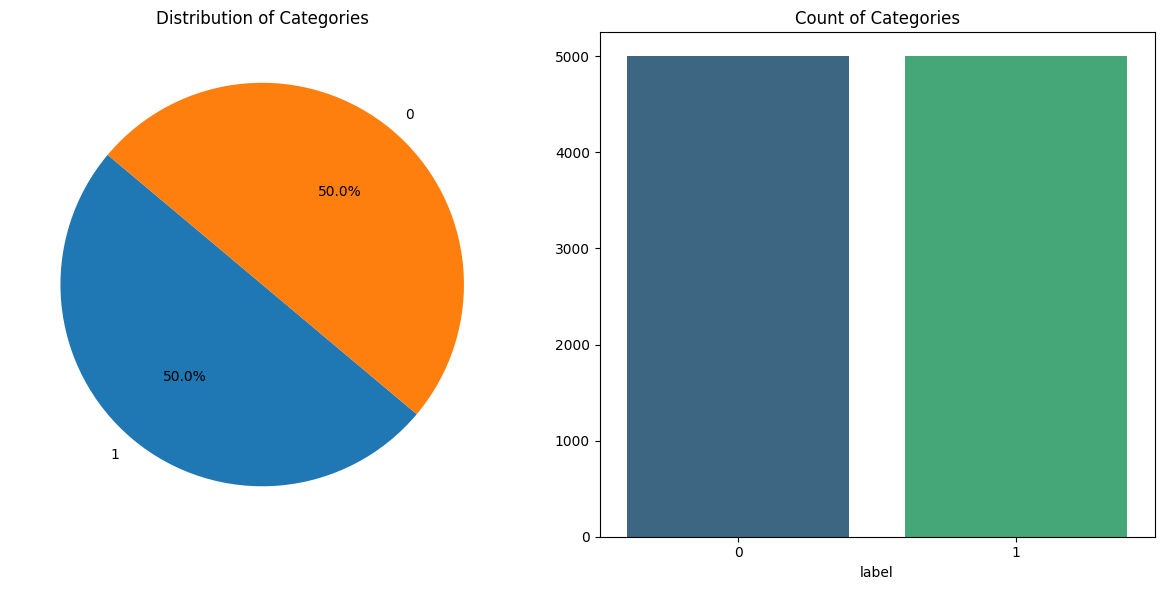

In [49]:
import pandas as pd
import seaborn as sns

# Assuming 'labels' is already defined from previous steps
# Create a DataFrame from the labels
df_train = pd.DataFrame({'label': Y}) # Using the Y numpy array for labels

# Count the occurrences of each category in the 'label' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-930537150.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


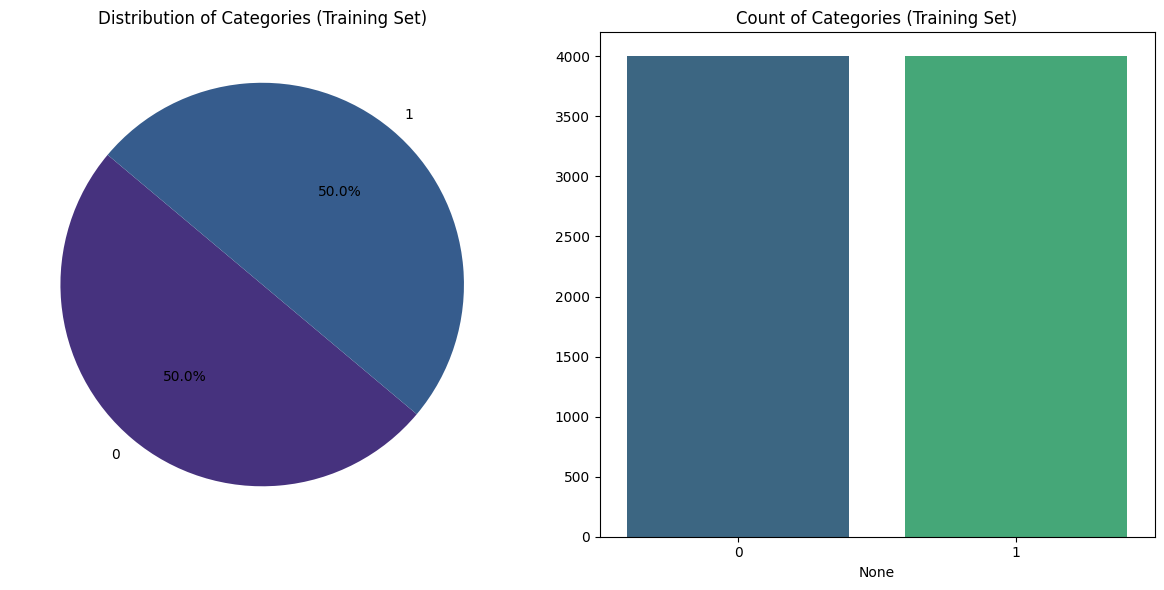

In [50]:
import pandas as pd
import seaborn as sns

# Count the occurrences of each category in Y_train
count = pd.Series(Y_train).value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories (Training Set)')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories (Training Set)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [52]:
display(df_train.describe())

,label
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000
